In [6]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [7]:
#conv layers
model = Sequential()
#model.add(Conv2D(64, (3, 3), input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),input_shape = (150,150,3), activation = 'relu'))
 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))

 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))




In [8]:
#fully connected layers
model.add(Flatten())  
 
model.add(Dense( activation = 'relu', units=64))

model.add(Dense( activation = 'softmax', units=3)) 
 


In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:

train_datagen = ImageDataGenerator(
        rescale=1./255,
       )

test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_set = train_datagen.flow_from_directory(
        r'C:\Users\Abhi\Desktop\Class Document\Tensorflow\cnn\3-Keras-cnn-multiclass\data\train',
        target_size=(150, 150),
        class_mode='categorical')

Found 1050 images belonging to 3 classes.


In [14]:
test_set = test_datagen.flow_from_directory(
        r'C:\Users\Abhi\Desktop\Class Document\Tensorflow\cnn\3-Keras-cnn-multiclass\data\test',
        target_size=(150, 150),
        class_mode='categorical')

Found 105 images belonging to 3 classes.


In [30]:
model.fit_generator(
        train_set,
        epochs=10,
        validation_data=test_set)


Epoch 1/10
33/33 [==============================] - 56s 2s/step - loss: 0.7022 - accuracy: 0.6981 - val_loss: 0.7941 - val_accuracy: 0.6476
Epoch 2/10
33/33 [==============================] - 46s 1s/step - loss: 0.5235 - accuracy: 0.7971 - val_loss: 0.7695 - val_accuracy: 0.6857
Epoch 3/10
33/33 [==============================] - 45s 1s/step - loss: 0.4567 - accuracy: 0.8267 - val_loss: 0.3284 - val_accuracy: 0.7619
Epoch 4/10
33/33 [==============================] - 50s 2s/step - loss: 0.3477 - accuracy: 0.8676 - val_loss: 0.4179 - val_accuracy: 0.7905
Epoch 5/10
33/33 [==============================] - 45s 1s/step - loss: 0.2659 - accuracy: 0.9057 - val_loss: 0.4708 - val_accuracy: 0.7333
Epoch 6/10
33/33 [==============================] - 45s 1s/step - loss: 0.2484 - accuracy: 0.9057 - val_loss: 0.4743 - val_accuracy: 0.6952
Epoch 7/10
33/33 [==============================] - 42s 1s/step - loss: 0.1817 - accuracy: 0.9486 - val_loss: 1.6208 - val_accuracy: 0.7333
Epoch 8/10
33/33 [==

In [31]:
train_set.class_indices

{'airplane': 0, 'car': 1, 'motorbike': 2}

In [32]:
label_map = (train_set.class_indices)
print(label_map)

{'airplane': 0, 'car': 1, 'motorbike': 2}


In [33]:
#Prediction

In [52]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('data/inference/car1.jpeg'
                           ,target_size =(150,150))


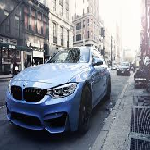

In [53]:
test_image

In [54]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [55]:
test_image.shape

(150, 150, 3)

In [56]:
test_image=test_image.reshape(1,150, 150, 3)

In [57]:
## For single prediction change the dimension using axis. To remove problem of batch
#test_image = np.expand_dims(test_image,axis = 0)
result = model.predict(test_image)

In [58]:
np.around(result)

array([[0., 1., 0.]], dtype=float32)

In [59]:
result=result.argmax()

In [60]:
result

1

In [61]:
## Class label of dog and cat

if result == 0:
    prediction = 'airplane'
elif result == 1:
    prediction = 'car'
else:
    prediction = 'bike'
    

In [62]:
prediction

'car'

In [63]:
#SAVE MODE

In [64]:
#SERIALIZE MODEL TO json
model_json=model.to_json()
with open("model1.json","w") as json_file:
    json_file.write(model_json)
#serialize weights to HDF5
model.save_weights("model1.h5")
print("Saved model to disk")

Saved model to disk


In [66]:
import pandas as pd
df=pd.read_json('model1.json')

In [74]:
pd.set_option('display.max_columns', None)

df

,class_name,config,keras_version,backend
layers,Sequential,"[{'class_name': 'Conv2D', 'config': {'name': '...",2.3.1,tensorflow
name,Sequential,sequential_2,2.3.1,tensorflow


In [76]:
pd.set_option('display.max_colwidth', -1)
df['config']

layers    [{'class_name': 'Conv2D', 'config': {'name': 'conv2d_4', 'trainable': True, 'batch_input_shape': [None, 150, 150, 3], 'dtype': 'float32', 'filters': 64, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_4', 'trainable': True, 'dtype': 'float32', 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}}, {'class_name': 'Conv2D', 'config': {'name': 'conv2d_5', 'trainable': True, 'dtype': 'float32', 'filters': 64, 'kernel_size': [3, 3], 'st